In [27]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from opensignalsreader import OpenSignalsReader
import os

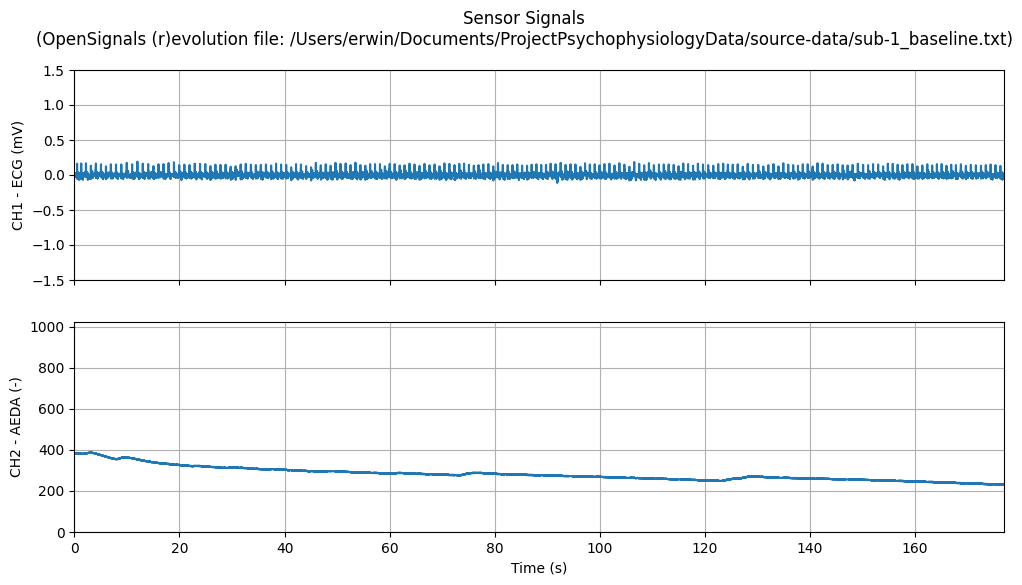

[-0.03808594 -0.04101562 -0.04101562 -0.03808594 -0.03808594]
[383. 383. 383. 383. 383.]
Wrote files /Users/erwin/Documents/ProjectPsychophysiologyData/raw-data//sub-1_baseline_ecg.csv and /Users/erwin/Documents/ProjectPsychophysiologyData/raw-data//sub-1_baseline_eda.csv


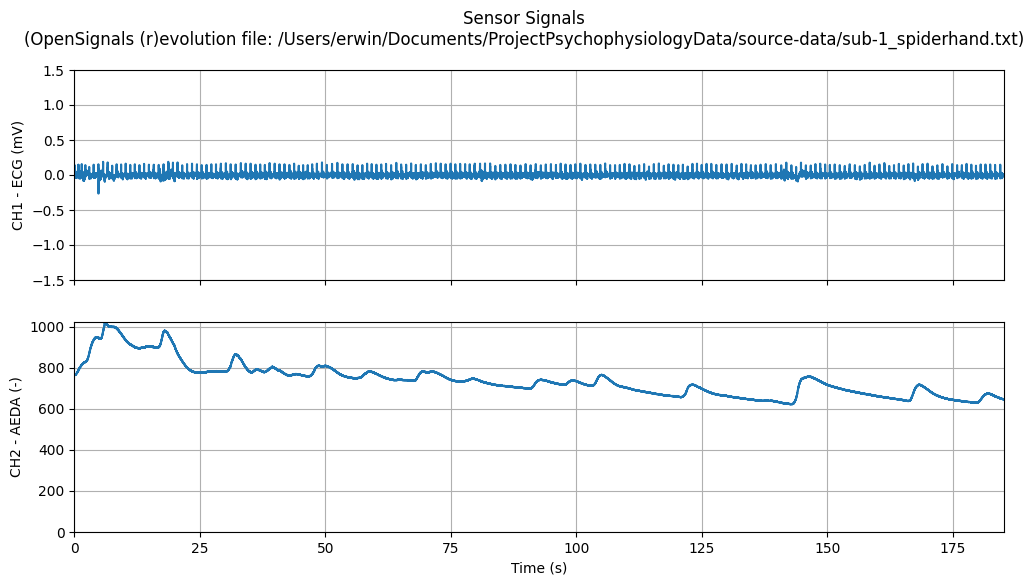

[-0.00292969  0.          0.          0.          0.        ]
[764. 764. 764. 764. 764.]
Wrote files /Users/erwin/Documents/ProjectPsychophysiologyData/raw-data//sub-1_spiderhand_ecg.csv and /Users/erwin/Documents/ProjectPsychophysiologyData/raw-data//sub-1_spiderhand_eda.csv


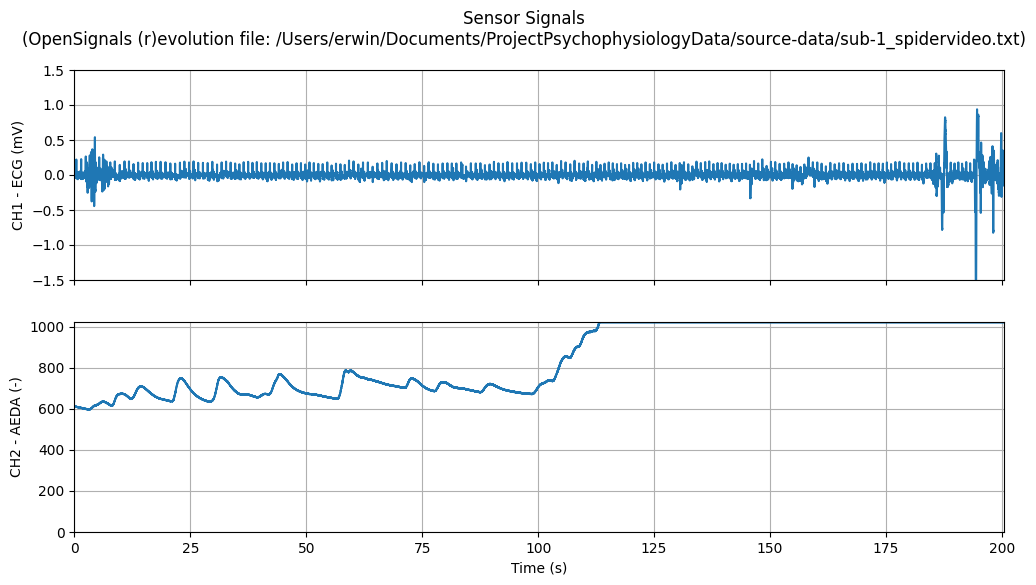

[0.03222656 0.03222656 0.03222656 0.03222656 0.03222656]
[611. 611. 611. 611. 611.]
Wrote files /Users/erwin/Documents/ProjectPsychophysiologyData/raw-data//sub-1_spidervideo_ecg.csv and /Users/erwin/Documents/ProjectPsychophysiologyData/raw-data//sub-1_spidervideo_eda.csv


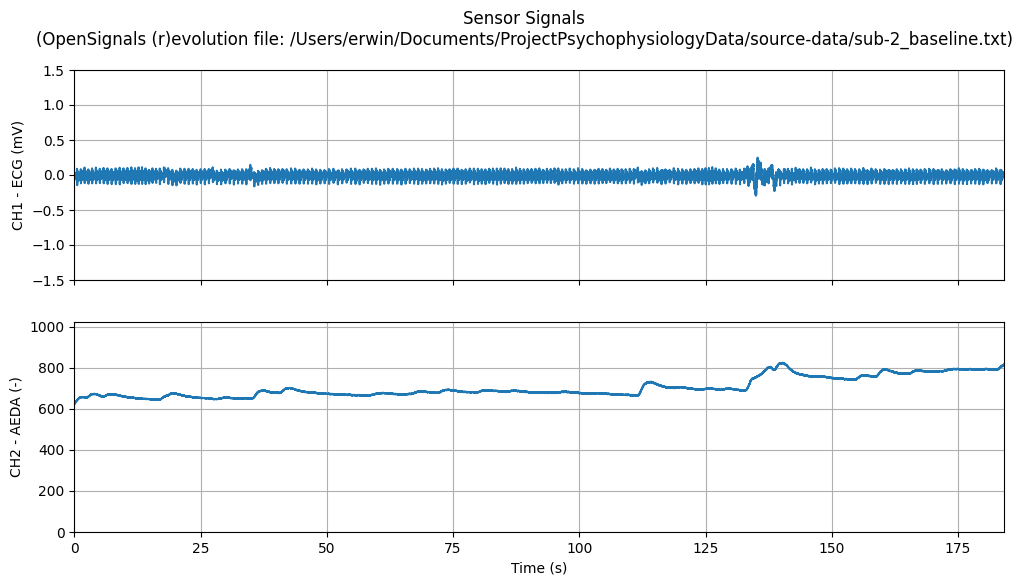

[0.02929688 0.0234375  0.01757812 0.00878906 0.00292969]
[623. 623. 623. 623. 623.]
Wrote files /Users/erwin/Documents/ProjectPsychophysiologyData/raw-data//sub-2_baseline_ecg.csv and /Users/erwin/Documents/ProjectPsychophysiologyData/raw-data//sub-2_baseline_eda.csv


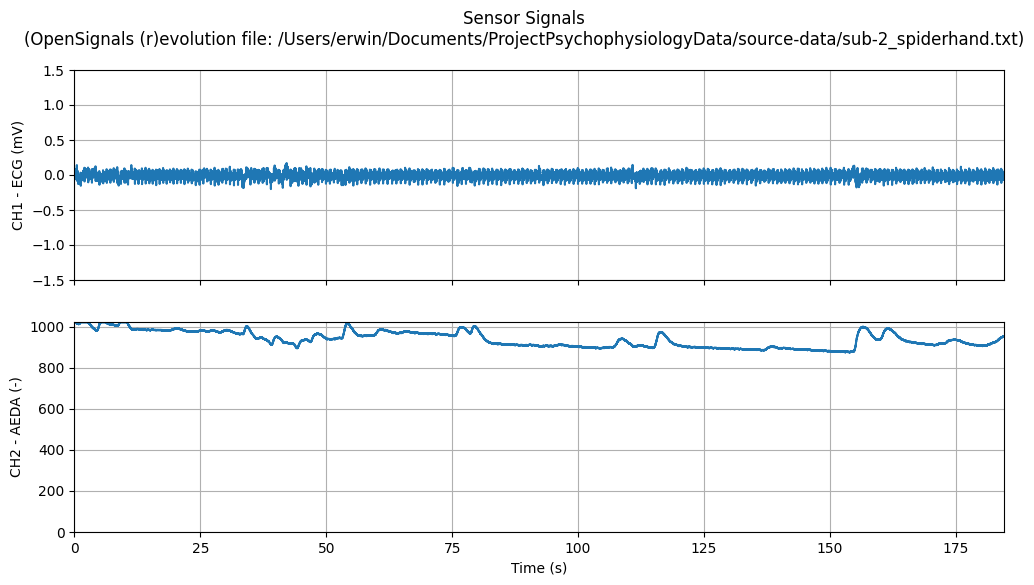

[-0.02929688 -0.02929688 -0.03222656 -0.03222656 -0.02636719]
[1020. 1020. 1020. 1020. 1020.]
Wrote files /Users/erwin/Documents/ProjectPsychophysiologyData/raw-data//sub-2_spiderhand_ecg.csv and /Users/erwin/Documents/ProjectPsychophysiologyData/raw-data//sub-2_spiderhand_eda.csv


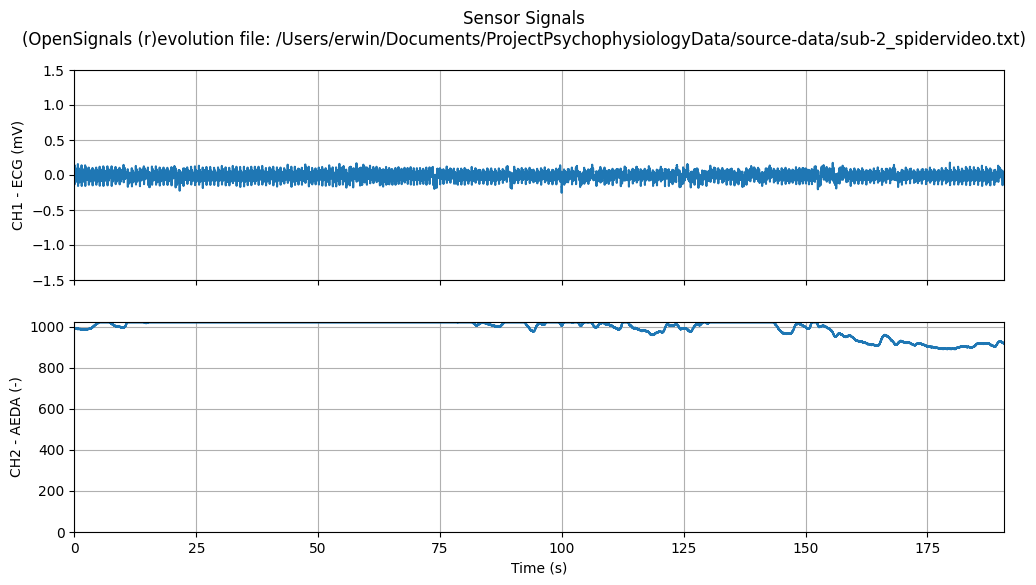

[0.09082031 0.09082031 0.08496094 0.07324219 0.07324219]
[990. 990. 990. 989. 990.]
Wrote files /Users/erwin/Documents/ProjectPsychophysiologyData/raw-data//sub-2_spidervideo_ecg.csv and /Users/erwin/Documents/ProjectPsychophysiologyData/raw-data//sub-2_spidervideo_eda.csv


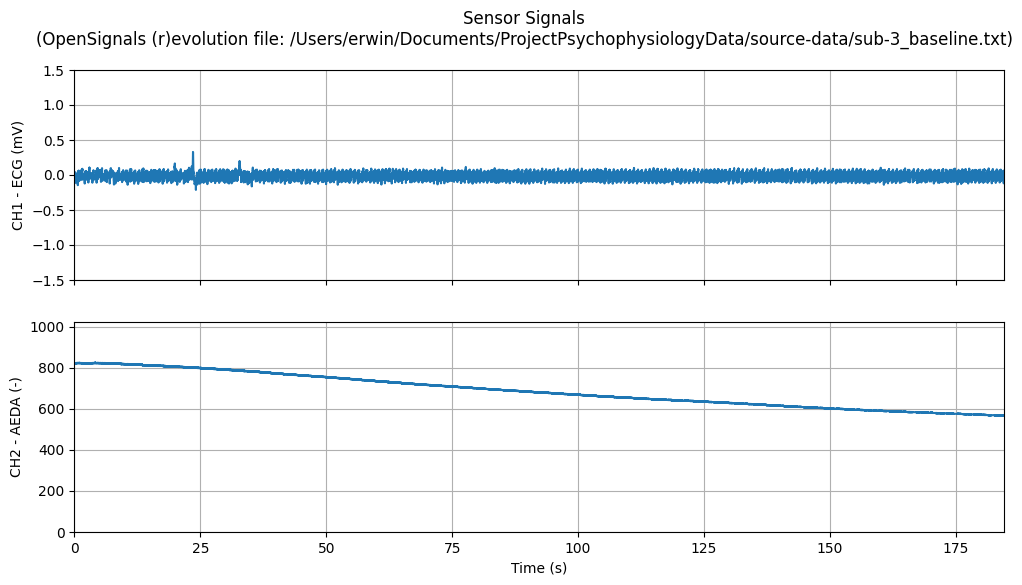

[-0.03222656 -0.02929688 -0.02636719 -0.02636719 -0.0234375 ]
[820. 819. 820. 820. 820.]
Wrote files /Users/erwin/Documents/ProjectPsychophysiologyData/raw-data//sub-3_baseline_ecg.csv and /Users/erwin/Documents/ProjectPsychophysiologyData/raw-data//sub-3_baseline_eda.csv


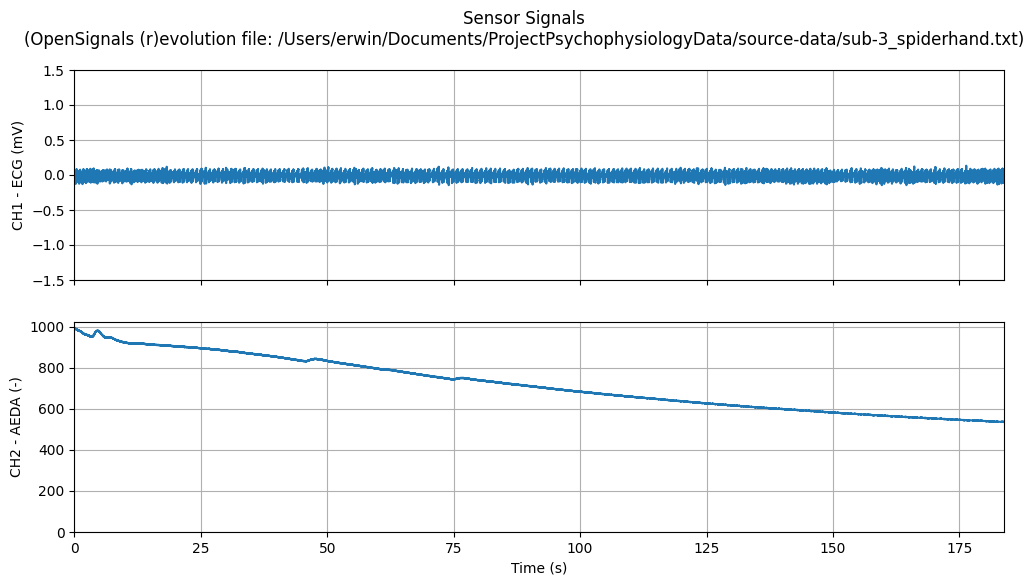

[0. 0. 0. 0. 0.]
[995. 995. 995. 995. 995.]
Wrote files /Users/erwin/Documents/ProjectPsychophysiologyData/raw-data//sub-3_spiderhand_ecg.csv and /Users/erwin/Documents/ProjectPsychophysiologyData/raw-data//sub-3_spiderhand_eda.csv


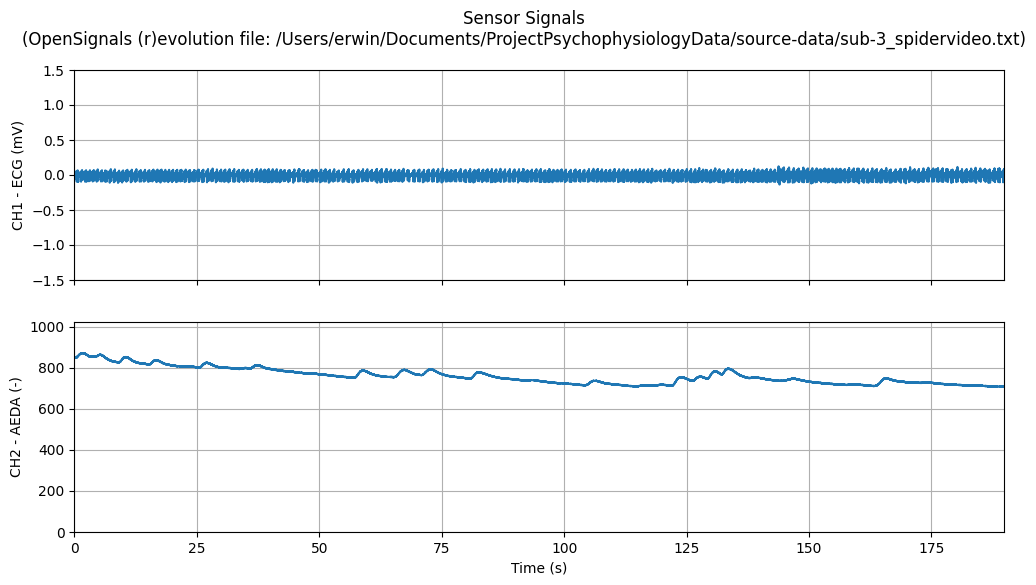

[ 0.          0.         -0.00585937 -0.00878906 -0.00292969]
[848. 848. 848. 848. 848.]
Wrote files /Users/erwin/Documents/ProjectPsychophysiologyData/raw-data//sub-3_spidervideo_ecg.csv and /Users/erwin/Documents/ProjectPsychophysiologyData/raw-data//sub-3_spidervideo_eda.csv


In [28]:
# Parameters
sourceDataFolder = '/Users/erwin/Documents/ProjectPsychophysiologyData/source-data'
rawDataFolder = '/Users/erwin/Documents/ProjectPsychophysiologyData/raw-data/'
participants = ['sub-1', 'sub-2', 'sub-3']
tasks = ['baseline', 'spiderhand', 'spidervideo']

# Ensure output directory exists
if not os.path.exists(rawDataFolder):
    os.makedirs(rawDataFolder)

for pi in participants:
    for ti in tasks:
        
            # assemble file name 
            filename = sourceDataFolder + '/' + pi + '_' + ti + '.txt'
            
            # Convert all other files 
            acq = OpenSignalsReader(filename, show=True)
            
            # Access the processed ECG / EDA signal and print the first 5 elements
            ecg_signal = acq.signal('ECG') 
            print(ecg_signal[:5]) 
            eda_signal = acq.signal('AEDA') #renamed to AEDA because of glitch
            print(eda_signal[:5]) 
        
            ## Save data in a .csv format 
            output_filename_ecg = rawDataFolder + '/' + pi + '_' + ti + '_ecg.csv'
            output_filename_eda = rawDataFolder + '/' + pi + '_' + ti + '_eda.csv'
        
            # Save the NumPy array to a CSV file
            np.savetxt(output_filename_ecg, ecg_signal, delimiter=',', header='ECG')
            np.savetxt(output_filename_eda, eda_signal, delimiter=',', header='EDA')
        
            print(f"Wrote files {output_filename_ecg} and {output_filename_eda}")